In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../skrmt')
from ensemble import GaussianEnsemble
from ensemble import WishartEnsemble
from ensemble import ManovaEnsemble
from ensemble import CircularEnsemble

# Histogramas ensembles

## Histogramas ensemble gaussiano

In [13]:
n = 1000

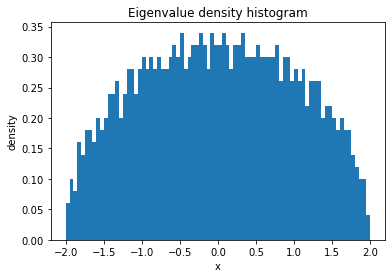

In [14]:
goe = GaussianEnsemble(beta=1, n=n, use_tridiagonal=True)
goe.plot_eigval_hist(bins=80, interval=(-2,2), density=True)

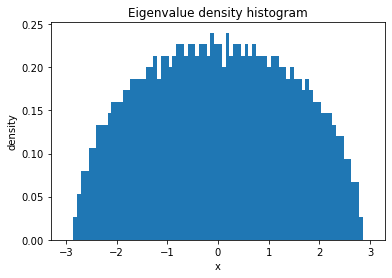

In [16]:
gue = GaussianEnsemble(beta=2, n=n, use_tridiagonal=True)
gue.plot_eigval_hist(bins=80, interval=(-3,3), density=True)

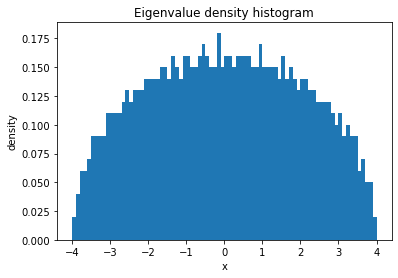

In [17]:
gse = GaussianEnsemble(beta=4, n=n, use_tridiagonal=True)
gse.plot_eigval_hist(bins=80, interval=(-4,4), density=True)

## Histogramas ensemble de Wishart

In [18]:
p, n = 1000, 5000

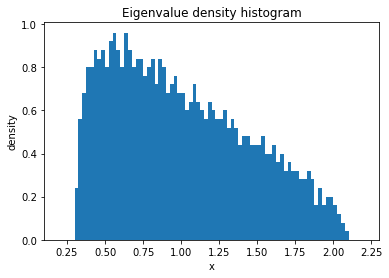

In [22]:
wre = WishartEnsemble(beta=1, p=p, n=n, use_tridiagonal=True)
wre.plot_eigval_hist(bins=80, interval=(0.2, 2.2), density=True)

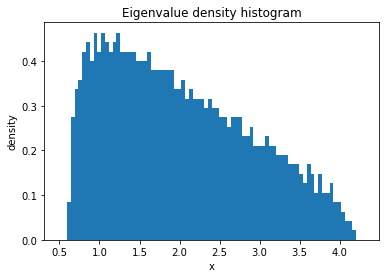

In [31]:
wce = WishartEnsemble(beta=2, p=p, n=n, use_tridiagonal=True)
wce.plot_eigval_hist(bins=80, interval=(0.5, 4.3), density=True)

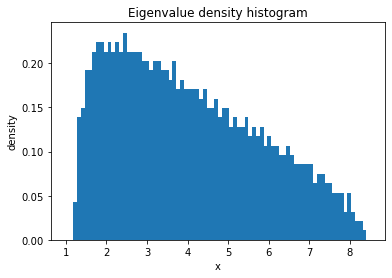

In [35]:
wqe = WishartEnsemble(beta=4, p=p, n=n, use_tridiagonal=True)
wqe.plot_eigval_hist(bins=80, interval=(1, 8.5), density=True)

## Histogramas ensemble Manova

In [3]:
import warnings
warnings.filterwarnings('once')

In [7]:
m, n1, n2 = 1000, 5000, 5000

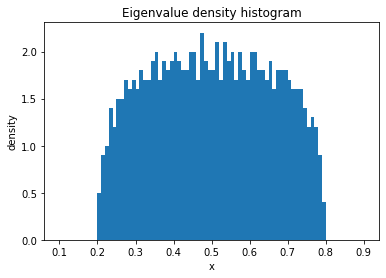

In [5]:
mre = ManovaEnsemble(beta=1, m=m, n1=n1, n2=n2)
mre.plot_eigval_hist(bins=80, interval=(0.1, 0.9), density=True)

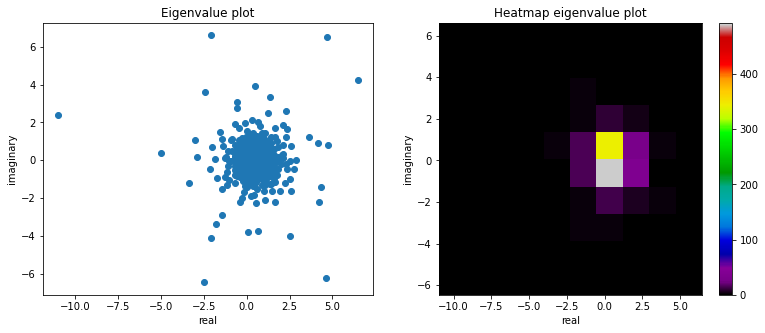

In [11]:
mce = ManovaEnsemble(beta=2, m=m, n1=n1, n2=n2)
mce.plot_eigval_hist(bins=80)

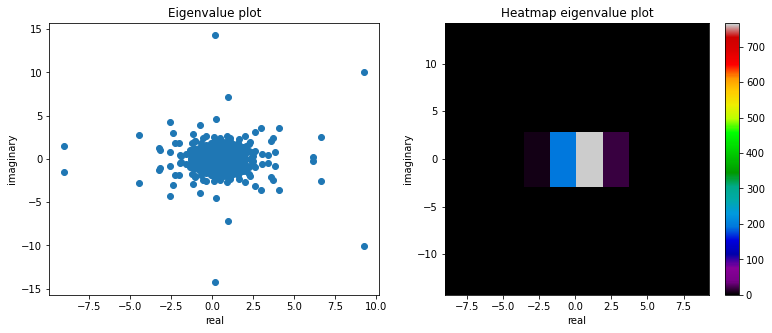

In [19]:
mqe = ManovaEnsemble(beta=4, m=m, n1=n1, n2=n2)
mqe.plot_eigval_hist(bins=80)

## Histogramas ensemble Circular

In [3]:
n = 1000

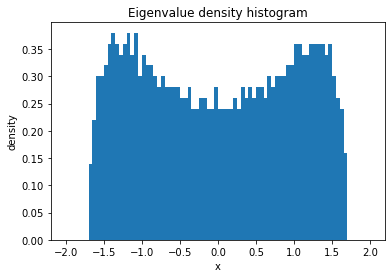

In [24]:
coe = CircularEnsemble(beta=1, n=n)
coe.plot_eigval_hist(bins=80, interval=(-2,2), density=True)

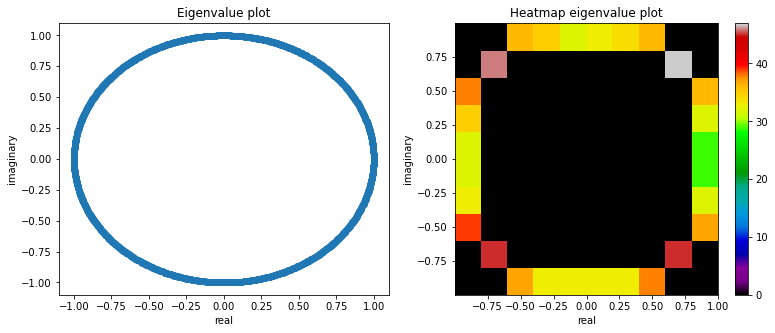

In [4]:
cue = CircularEnsemble(beta=2, n=n)
cue.plot_eigval_hist(bins=80)

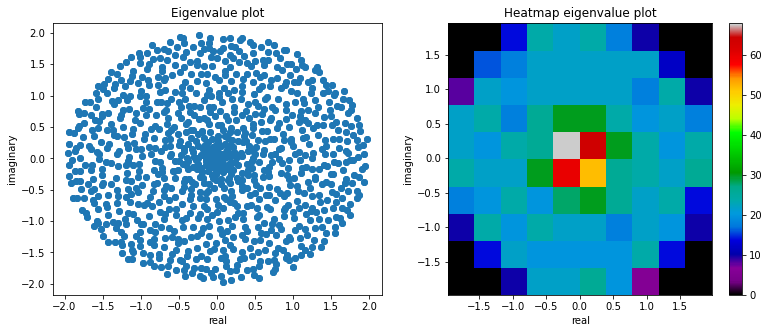

In [6]:
cse = CircularEnsemble(beta=4, n=n)
cse.plot_eigval_hist(bins=80)

# Ensemble Laws

In [22]:
from ensemble import wigner_semicircular_law
from ensemble import marchenko_pastur_law
from ensemble import tracy_widom_law

## Wigner's Semicircle Law

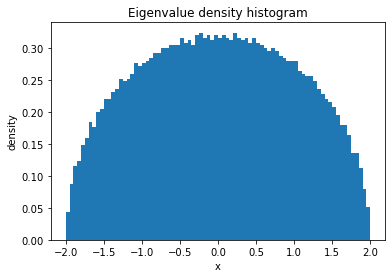

In [28]:
wigner_semicircular_law(ensemble='goe', n_size=5000, bins=80, density=True)

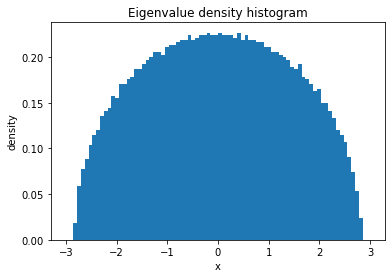

In [29]:
wigner_semicircular_law(ensemble='gue', n_size=5000, bins=80, density=True)

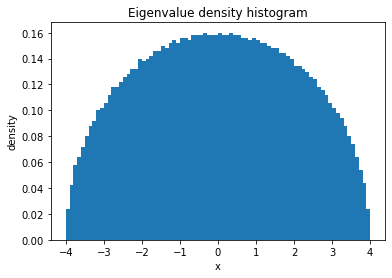

In [30]:
wigner_semicircular_law(ensemble='gse', n_size=5000, bins=80, density=True)

## Marchenko-Pastur Law

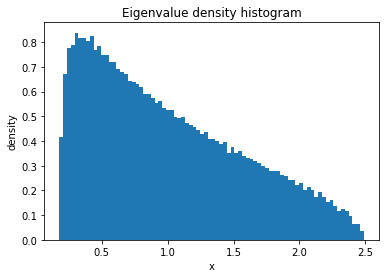

In [33]:
marchenko_pastur_law(ensemble='wre', p_size=5000, n_size=15000, bins=80, density=True)

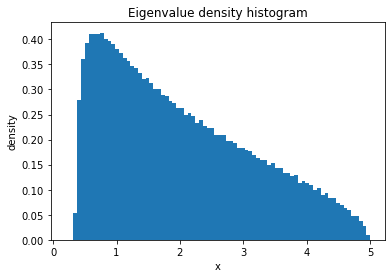

In [34]:
marchenko_pastur_law(ensemble='wce', p_size=5000, n_size=15000, bins=80, density=True)

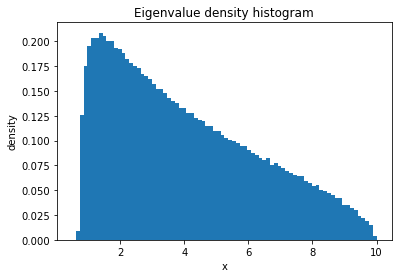

In [35]:
marchenko_pastur_law(ensemble='wqe', p_size=5000, n_size=15000, bins=80, density=True)

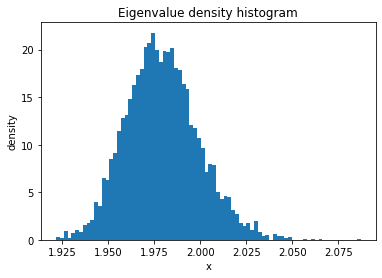

In [37]:
tracy_widom_law(ensemble='goe', n_size=500, times=5000, bins=80, density=True)

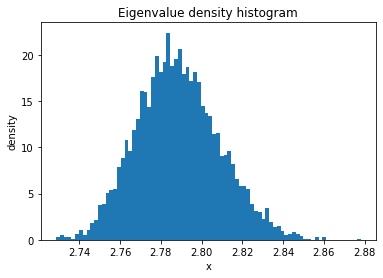

In [38]:
tracy_widom_law(ensemble='gue', n_size=500, times=5000, bins=80, density=True)

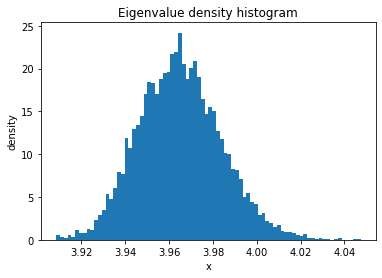

In [39]:
tracy_widom_law(ensemble='gse', n_size=500, times=5000, bins=80, density=True)

100 (-3, 3) True 101


<BarContainer object of 100 artists>

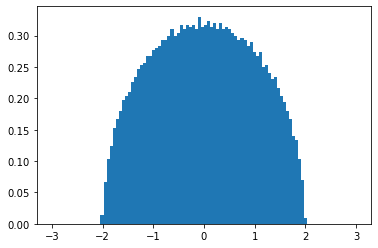

In [4]:
n = 5000
goe1 = GaussianEnsemble(beta=1, n=n, use_tridiagonal=True)

observed, bins = goe1.eigval_hist(bins=100, interval=(-3,3), density=True, norm_const=1/np.sqrt(n/2))

width = bins[1] - bins[0]
centers = get_bins_centers(bins, contour=False)

plt.bar(bins[:-1], observed, width=width, align='edge')


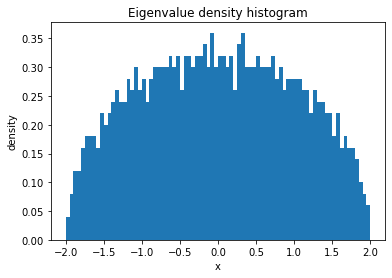

In [34]:
goe2 = GaussianEnsemble(beta=1, n=1000, use_tridiagonal=True)
goe2.plot_eigval_hist(bins=80, interval=(-2,2), density=True)

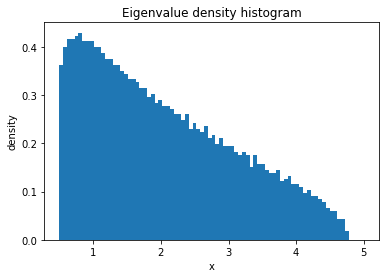

In [66]:
wr = WishartEnsemble(beta=2, n=10000, p=3000, use_tridiagonal=True)
wr.plot_eigval_hist(bins=80, interval=(0.5, 5), density=True)

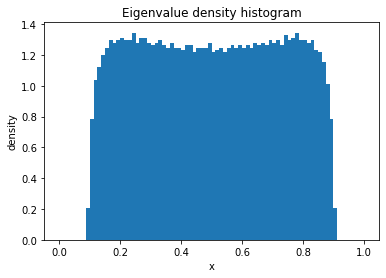

In [9]:
mre = ManovaEnsemble(beta=1, m=5000, n1=12000, n2=12000)
mre.plot_eigval_hist(bins=80, interval=(0,1), density=True)

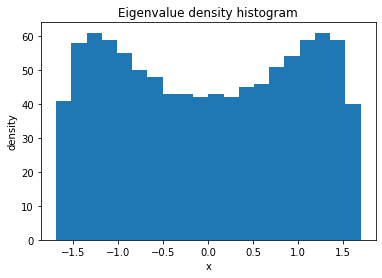

In [13]:
coe = CircularEnsemble(beta=1, n=1000)
coe.plot_eigval_hist(bins=20)

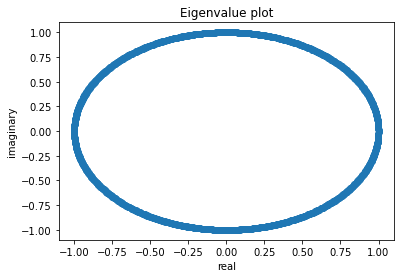

In [4]:
cue = CircularEnsemble(beta=2, n=1000)
cue.plot_eigval_hist(bins=20)

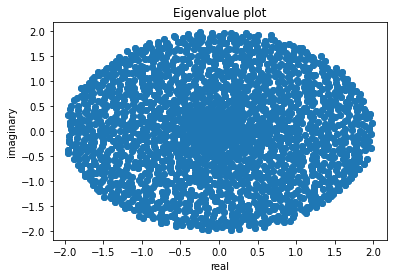

In [10]:
cse = CircularEnsemble(beta=4, n=2000)
cse.plot_eigval_hist(bins=20)

In [5]:
from ensemble import wigner_semicircular_law
from ensemble import marchenko_pastur_law
from ensemble import tracy_widom_law

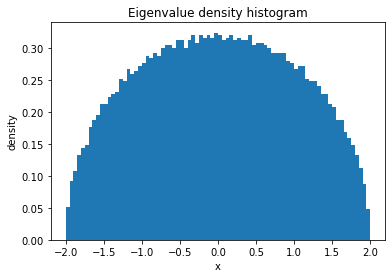

In [24]:
wigner_semicircular_law(ensemble='goe', n_size=5000, bins=80, density=True)

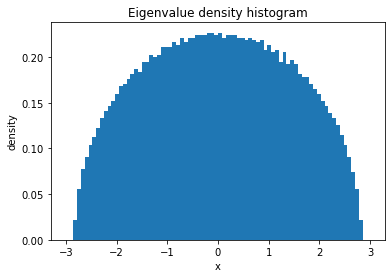

In [25]:
wigner_semicircular_law(ensemble='gue', n_size=5000, bins=80, density=True)

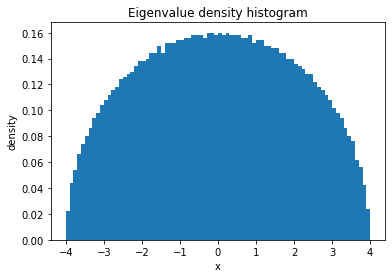

In [26]:
wigner_semicircular_law(ensemble='gse', n_size=5000, bins=80, density=True)

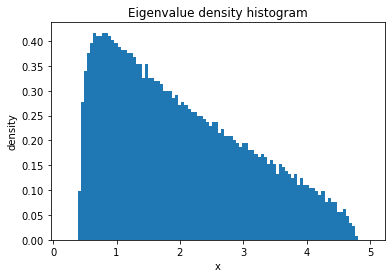

In [15]:
marchenko_pastur_law(ensemble='wce', p=3000, n=10000, bins=100, density=True)

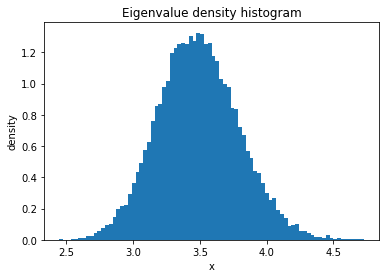

In [19]:
tracy_widom_law(ensemble='gse', n=10, t=30000, bins=80, density=True)